In [5]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
from sklearn.manifold import TSNE
import copy
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import sys
import math
import os
import shutil
import glob
import shap
from sklearn.model_selection import train_test_split

cmap='viridis'
sys.path.insert(1, '../')
from LibHelperFuncs import *

rstate = 0
np.random.seed(rstate)
njob = -1
global_trees = 100

np.random.seed(rstate)

from sklearn.linear_model import Ridge

In [6]:
originalDat = np.genfromtxt("../../Data/data_bas_preprocessing.csv", delimiter=',')
originalDat_pd = pd.read_csv("../../Data/data_bas_preprocessing_pd.csv")

X = originalDat[:,:-1]
Y = originalDat[:,-1]
C = originalDat_pd.columns


In [7]:
rd = Ridge()
rd.fit(X, Y)

exp = shap.LinearExplainer(rd, X)
s_vals = exp.shap_values(X)
ov_shap = np.mean(np.abs(s_vals), axis=0)

The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, or maskers.Impute)


In [8]:
pca = PCA(n_components=50)
pca.fit(X)
comps = pca.components_
X_r = (comps @ X.T).T

rd = Ridge()
rd.fit(X_r, Y)

exp = shap.LinearExplainer(rd, X_r)
s_vals = exp.shap_values(X_r)
ov_reduced_shap = mean_carried_shap(s_vals, pca.components_, X)

The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, or maskers.Impute)


In [10]:
urscorecv=[]
rscorecv=[]
urscorel2=[]
rscorel2=[]

renge = range(1, X.shape[1])

for k in renge:
    if k % 10 == 0:
        print(k)
    X_l = X[:,np.argsort(ov_shap)[::-1][:k]]

    rf = Ridge()

    rf.fit(X_l, Y)
    urscorel2.append(model_eval(X_l, Y, rd, rstate=rstate))
    urscorecv.append(model_crosseval(X_l, Y, rd))

    X_r = X[:,np.argsort(ov_reduced_shap)[::-1][:k]]

    rf = Ridge()

    rf.fit(X_r, Y)
    rscorel2.append(model_eval(X_r, Y, rd, rstate=rstate))
    rscorecv.append(model_crosseval(X_r, Y, rd))

10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380


0.0012396075652519468 0.001281407738376748
0.0019493042575213257 0.055470500007016185


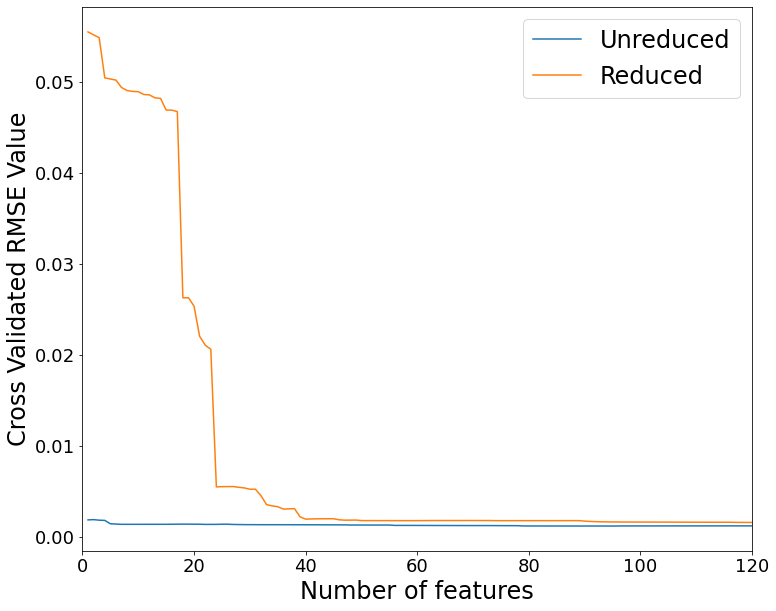

In [17]:
plt.figure(figsize=(12,10))

plt.plot(renge, urscorecv, label = 'Unreduced')
plt.plot(renge, rscorecv, label='Reduced')

plt.xlabel('Number of features', fontsize=24)
plt.ylabel("Cross Validated RMSE Value", fontsize=24)

plt.xlim([0, 120])

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.legend(fontsize=24)

print(min(urscorecv), min(rscorecv))
print(max(urscorecv), max(rscorecv))

plt.savefig("../../Figures/LRA_ridge_cv_full.pdf", bbox_inches='tight')

0.03380312276539671 0.034524897847548364
0.04077886334272997 0.2254531414503437


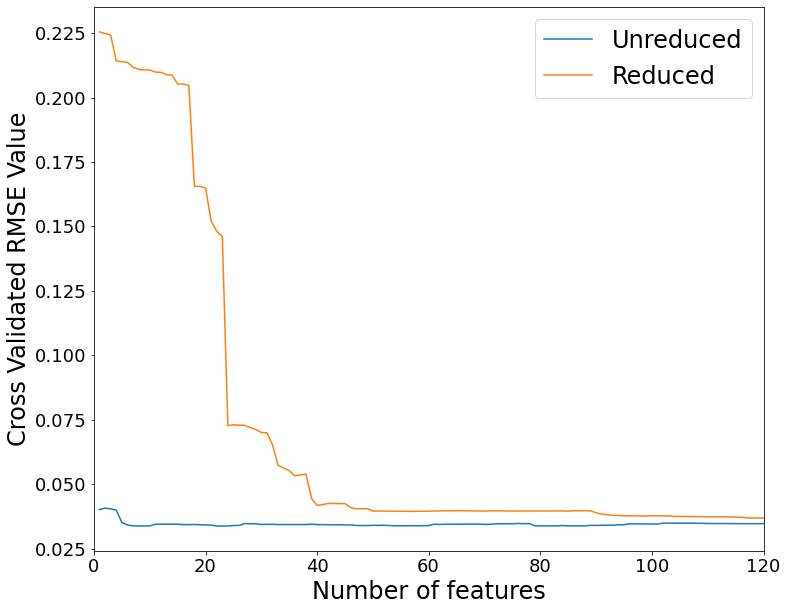

In [18]:
plt.figure(figsize=(12,10))

plt.plot(renge, urscorel2, label = 'Unreduced')
plt.plot(renge, rscorel2, label='Reduced')

plt.xlabel('Number of features', fontsize=24)
plt.ylabel("Cross Validated RMSE Value", fontsize=24)

plt.xlim([0, 120])

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.legend(fontsize=24)

print(min(urscorel2), min(rscorel2))
print(max(urscorel2), max(rscorel2))

plt.savefig("../../Figures/LRA_ridge_testing_full.pdf", bbox_inches='tight')